In [90]:
# Import pandas for data handling
import pandas as pd

# NLTK is our Natural-Language-Took-Kit
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopwords = stopwords.words('english')

# Libraries for helping us with strings
import string
# Regular Expression Library
import re

# Import text vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Import classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

#Import Regressor Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Import some ML helper function
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report


# Import our metrics to evaluate our model
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


# Library for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.sparse as sparse

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aleksandrageorgievska/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/aleksandrageorgievska/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/aleksandrageorgievska/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
df = pd.read_csv('../data/labeled_lyrics_w_genres.csv')

# Inspecting The Data

In [7]:
df.head()

,Unnamed: 0,artist,seq,song,label,genre
0,0,Elijah Blake,"No, no\r\nI ain't ever trapped out the bando\r...",Everyday,0.626,R&B
1,1,Elijah Blake,"The drinks go down and smoke goes up, I feel m...",Live Till We Die,0.630,Pop
2,2,Elijah Blake,She don't live on planet Earth no more\r\nShe ...,The Otherside,0.240,R&B
3,3,Elijah Blake,"Trippin' off that Grigio, mobbin', lights low\...",Pinot,0.536,R&B
4,4,Elijah Blake,"I see a midnight panther, so gallant and so br...",Shadows & Diamonds,0.371,R&B


In [8]:
df.isnull().sum().sum()

0

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(58100, 6)

In [12]:
df.genre.value_counts()

No_genre     21069
Pop          20691
Rock          9783
Country       2503
Rap           2311
R&B           1687
Non-Music       56
Name: genre, dtype: int64

### removing No_genre and Non-Music

In [40]:
df_dropped = df[(df['genre'] == 'No_genre') | (df['genre'] == 'Non-Music')].index
df.drop(df_dropped, inplace=True, axis='index')

In [41]:
print(df.shape)
df.head(15)

(36975, 6)


,Unnamed: 0,artist,seq,song,label,genre
0,0,Elijah Blake,"No, no\r\nI ain't ever trapped out the bando\r...",Everyday,0.6260,R&B
1,1,Elijah Blake,"The drinks go down and smoke goes up, I feel m...",Live Till We Die,0.6300,Pop
2,2,Elijah Blake,She don't live on planet Earth no more\r\nShe ...,The Otherside,0.2400,R&B
3,3,Elijah Blake,"Trippin' off that Grigio, mobbin', lights low\...",Pinot,0.5360,R&B
4,4,Elijah Blake,"I see a midnight panther, so gallant and so br...",Shadows & Diamonds,0.3710,R&B
5,5,Elijah Blake,I just want to ready your mind\r\n'Cause I'll ...,Uno,0.3210,R&B
7,7,Elis,Dieses ist lange her.\r\nDa ich deine schmalen...,Abendlied,0.3330,Pop
8,8,Elis,A child is born\r\nOut of the womb of a mother...,Child,0.5060,Pop
9,9,Elis,Out of the darkness you came \r\nYou looked so...,Come to Me,0.1790,Pop
10,10,Elis,Each night I lie in my bed \r\nAnd I think abo...,Do You Believe,0.2090,Pop


In [42]:
df.genre.value_counts()

Pop        20691
Rock        9783
Country     2503
Rap         2311
R&B         1687
Name: genre, dtype: int64

# Data Cleaning (Text Pre Processing)


In [43]:
# 1. function that makes all text lowercase.
def make_lowercase(test_string):
    return test_string.lower()

# 2. function that removes all punctuation. 
def remove_punc(test_string):
    test_string = re.sub(r'[^\w\s]', '', test_string)
    return test_string

# 3. function that removes all stopwords.
def remove_stopwords(test_string):
    # Break the sentence down into a list of words
    words = word_tokenize(test_string)
    
    # Make a list to append valid words into
    valid_words = []
    
    # Loop through all the words
    for word in words:
        
        # Check if word is not in stopwords. Stopwords was imported from nltk.corpus
        if word not in stopwords:
            
            # If word not in stopwords, append to our valid_words
            valid_words.append(word)

    # Join the list of words together into a string
    a_string = ' '.join(valid_words)

    return a_string

# 4. function to break words into their stem words
def stem_words(a_string):
    # Initalize our Stemmer
    porter = PorterStemmer()
    
    # Break the sentence down into a list of words
    words = word_tokenize(a_string)
    
    # Make a list to append valid words into
    valid_words = []

    # Loop through all the words
    for word in words:
        # Stem the word
        stemmed_word = porter.stem(word) #from nltk.stem import PorterStemmer
        
        # Append stemmed word to our valid_words
        valid_words.append(stemmed_word)
        
    # Join the list of words together into a string
    a_string = ' '.join(valid_words)

    return a_string 

In [45]:
# Pipeline

def text_processing_pipeline(a_string):
    a_string = make_lowercase(a_string)
    a_string = remove_punc(a_string)
    a_string = remove_stopwords(a_string)
    a_string = stem_words(a_string)
    return a_string


In [47]:
df['seq_clean'] = df['seq'].apply(text_processing_pipeline)

In [48]:
df.head()

,Unnamed: 0,artist,seq,song,label,genre,seq_clean
0,0,Elijah Blake,"No, no\r\nI ain't ever trapped out the bando\r...",Everyday,0.626,R&B,aint ever trap bando oh lord dont get wrong kn...
1,1,Elijah Blake,"The drinks go down and smoke goes up, I feel m...",Live Till We Die,0.630,Pop,drink go smoke goe feel got let go care get lo...
2,2,Elijah Blake,She don't live on planet Earth no more\r\nShe ...,The Otherside,0.240,R&B,dont live planet earth found love venu that wo...
3,3,Elijah Blake,"Trippin' off that Grigio, mobbin', lights low\...",Pinot,0.536,R&B,trippin grigio mobbin light low trippin grigio...
4,4,Elijah Blake,"I see a midnight panther, so gallant and so br...",Shadows & Diamonds,0.371,R&B,see midnight panther gallant brave found found...


# Testing Regression Models for label prediction:
label = float scale (0-1) which signifies valence 



In [49]:
X = df['seq_clean'].values

y = df['label'].values

In [50]:
# Split our data into testing and training like always. 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


# Save the raw text for later just incase
X_train_text = X_train
X_test_text = X_test

In [51]:
# Initialize our vectorizer
vectorizer = TfidfVectorizer()

# 3. Fit your vectorizer using your X data
# This makes your vocab matrix
vectorizer.fit(X_train)

# 4. Transform your X data using your fitted vectorizer. 
# This transforms your documents into vectors.
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

# 5. Print the shape of your X.  53841 features (aka columns)
print(X_train.shape, type(X))

(29580, 53841) <class 'numpy.ndarray'>


In [52]:
features = vectorizer.get_feature_names()
weights = vectorizer.idf_

print(len(features), len(weights))

df_idf = pd.DataFrame.from_dict( {'feature': features, 'idf': weights})

df_idf = df_idf.sort_values(by='idf', ascending=False)

df_idf

53841 53841


,feature,idf
0,00,10.601740
30796,mrmarsello,10.601740
30798,mroe,10.601740
30799,mroffic,10.601740
30800,mrp,10.601740
...,...,...
27682,love,1.889392
27040,like,1.885778
13620,dont,1.855740
25718,know,1.746861


In [54]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)



In [55]:
accuracy = lr.score(X_test, y_test)
print("Model Accuracy: %f" % accuracy)

r_squared = metrics.r2_score(y_test, y_pred)
print('R-Squared Score:', r_squared)

# USE SKLEARN'S MEAN_ABSOLUTE_ERROR FUNCTION TO SCORE OUR PREDICTIONS VS OUR ACTUAL
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Model Accuracy: -163.282398
R-Squared Score: -163.282397824294
Mean Absolute Error: 1.3832761064926713


# Summary So Far for Valence Prediction:
### Models that did not work:
- LinearRegression
    - Model Accuracy: -163.282398
    - R-Squared Score: -163.282397824294
    - Mean Absolute Error: 1.3832761064926713


# Testing Classification Models for genre prediction:



In [56]:
X = df['seq_clean'].values
y = df['genre'].values

# Split our data into testing and training like always. 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


# Save the raw text for later just incase
X_train_text = X_train
X_test_text = X_test

# Initialize our vectorizer
vectorizer = TfidfVectorizer()

# 3. Fit your vectorizer using your X data
# This makes your vocab matrix
vectorizer.fit(X_train)

# 4. Transform your X data using your fitted vectorizer. 
# This transforms your documents into vectors.
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

# 5. Print the shape of your X.  53841 features (aka columns)
print(X_train.shape, type(X))

(29580, 53841) <class 'numpy.ndarray'>


### Multinomial Naive Bayes

In [73]:
# Initalize our model.
mnb = MultinomialNB(alpha=.05)

# Fit our model with our training data.
mnb.fit(X_train, y_train)

# Make new predictions of our testing data. 
y_pred = mnb.predict(X_test)

# Make predicted probabilites of our testing data
y_pred_proba = mnb.predict_proba(X_test)

# Evaluate our model
accuracy =  mnb.score(X_test, y_test)

# Print our evaluation metrics
print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.603110


In [74]:
print(classification_report(y_test, y_pred, target_names=mnb.classes_))

              precision    recall  f1-score   support

     Country       0.51      0.04      0.07       536
         Pop       0.60      0.91      0.72      4133
         R&B       0.40      0.02      0.03       345
         Rap       0.80      0.70      0.74       433
        Rock       0.53      0.19      0.28      1948

    accuracy                           0.60      7395
   macro avg       0.57      0.37      0.37      7395
weighted avg       0.58      0.60      0.53      7395



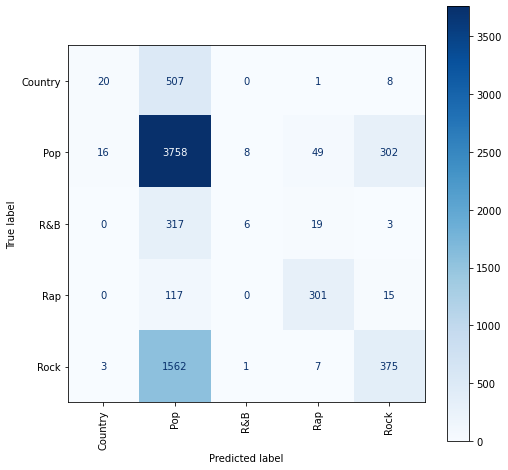

In [75]:
# Plot the confusion matrix of our results
fig, ax = plt.subplots(figsize=(8, 8))

disp = plot_confusion_matrix(mnb, X_test, y_test,
                             display_labels=mnb.classes_,
                             cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=90)
disp

### Random Forest Classifier

In [67]:
rf_model = RandomForestClassifier()

# Fit our model with our training data.
rf_model.fit(X_train, y_train)


# Make new predictions of our testing data. 
y_pred = rf_model.predict(X_test)


# Make predicted probabilites of our testing data
y_pred_proba = rf_model.predict_proba(X_test)

# Evaluate our model
accuracy =  rf_model.score(X_test, y_test)

# Print our evaluation metrics
print("Model Accuracy: %f" % accuracy)

print(classification_report(y_test, y_pred, target_names=rf_model.classes_))

Model Accuracy: 0.596078
              precision    recall  f1-score   support

     Country       0.33      0.02      0.03       536
         Pop       0.59      0.96      0.73      4133
         R&B       0.18      0.01      0.02       345
         Rap       0.88      0.64      0.74       433
        Rock       0.57      0.07      0.13      1948

    accuracy                           0.60      7395
   macro avg       0.51      0.34      0.33      7395
weighted avg       0.56      0.60      0.49      7395



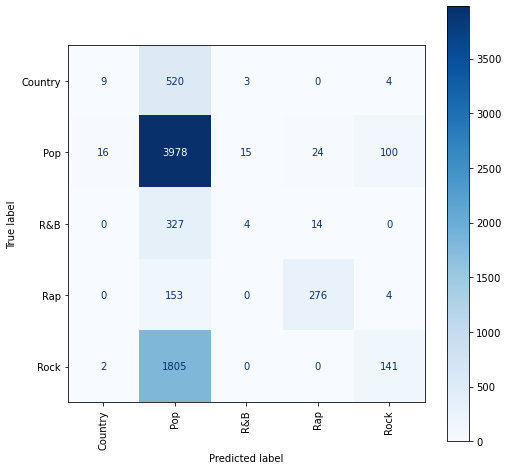

In [76]:
# Plot the confusion matrix of our results
fig, ax = plt.subplots(figsize=(8, 8))

disp = plot_confusion_matrix(rf_model, X_test, y_test,
                             display_labels=rf_model.classes_,
                             cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=90)
disp

# Observations:
#### RF & MNB most confused:
- Pop with Rock (~1500 to 1800)  
- Pop with Country (~500)

In [64]:
# Models to test: RandomForest, DT, MultinomialNB, KNN


### KNN 

In [79]:
def train_test_knn(X_train, X_test, y_train, y_test, k):
    '''
    Fit a k Nearest Neighbors classifier to the training data X_train, y_train.
    Return the accuracy of resulting predictions on the test data.
    '''
    
    # 1. Create the  KNeighborsClassifier model object below and assign to variable 'model'
    model = KNeighborsClassifier(n_neighbors = k)

    # 2. Fit the model to the training data below
    model.fit(X_train, y_train)
    
    # 3. Make predictions on the test data below and assign the result to the variable 'class_label_predictions'
    class_label_predictions = model.predict(X_test)

    # 4. Compute the accuracy here and save the result to the variable 'acc_score'
    acc_score = accuracy_score(y_test, class_label_predictions)
    
    
    return acc_score

In [81]:
k_values = [10, 100, 1000, 10000]

acc1 = [] 

for k in k_values:
    score = train_test_knn(X_train, X_test, y_train, y_test, k)
    print('k=' + str(k) + ', accuracy score: ' + str(score))
    acc1.append(float(score))
  

k=10, accuracy score: 0.5663286004056796
k=100, accuracy score: 0.586342123056119
k=1000, accuracy score: 0.5843137254901961
k=10000, accuracy score: 0.5588911426639621


In [82]:
knn = KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [84]:
print(classification_report(y_test, y_pred, target_names=knn.classes_))

              precision    recall  f1-score   support

     Country       0.00      0.00      0.00       536
         Pop       0.58      0.99      0.73      4133
         R&B       0.00      0.00      0.00       345
         Rap       0.86      0.48      0.62       433
        Rock       0.64      0.02      0.04      1948

    accuracy                           0.59      7395
   macro avg       0.42      0.30      0.28      7395
weighted avg       0.54      0.59      0.45      7395



In [87]:
# Trying to improve knn with KFold Cross Validation

num_folds = 5
folds = KFold(n_splits = num_folds, random_state=None)

acc_scores = []

for train_row_index, test_row_index in folds.split(X_train): 
    
    # our new partition of X_train and X_val
    X_train_new = X_train.iloc[train_row_index] # cannot use iloc because X_train is matrix not pandas object
    X_val = X_train.iloc[test_row_index]
    
    # our new partition of y_train and y_val
    y_train_new = y_train.iloc[train_row_index]
    y_val = y_train.iloc[test_row_index]
    
    knn_model.fit(X_train_new, y_train_new)
    predictions = knn_model.predict(X_val)
     
    iteration_accuracy = accuracy_score(predictions , y_val)
    acc_scores.append(iteration_accuracy)
     
        
for i in range(len(acc_scores)):
    print('Accuracy score for iteration {0}: {1}'.format(i+1, acc_scores[i]))

avg_scores = sum(acc_scores)/num_folds
print('\nAverage accuracy score: {}'.format(avg_scores))

AttributeError: iloc not found

In [89]:
type(X_train)

scipy.sparse.csr.csr_matrix

# To-Do research improving KNN
- cannot use iloc in KFold splitting because X_train is matrix not pandas object
- Read this:
    - https://towardsdatascience.com/text-classification-using-k-nearest-neighbors-46fa8a77acc5

# Summary So Far for Genre Classification:
- Multinomial Naive Bayes
    - Model Accuracy: 0.603110
- Random Forest Classifier
    - Model Accuracy: 0.596078
- Knn
    - where k=1000, accuracy score: 0.5843137254901961